In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(train_input , train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

target_name = {0:'t-shirt', 1:'pants', 2:'sweater', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneakers', 8:'bag', 9:'ankle_boots'}

train_scaled = train_input.reshape(-1, 28*28) / 255.0 
test_scaled = test_input.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [4]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Metal device set to: Apple M1 Pro


2023-02-19 18:27:19.231159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-19 18:27:19.231267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-02-19 18:27:19.756306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 18:27:19.879019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 4ms/step - loss: 0.6122 - accuracy: 0.7910
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4812 - accuracy: 0.8388
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4561 - accuracy: 0.8469
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4448 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4368 - accuracy: 0.8565


In [5]:
model.evaluate(val_scaled,val_target)

 46/375 [==>...........................] - ETA: 1s - loss: 0.4326 - accuracy: 0.8607

2023-02-19 18:27:53.155241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.8480


[0.4634348452091217, 0.8479999899864197]

2023-02-19 18:27:54.432349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 322ms/step
predict_result => ankle_boots


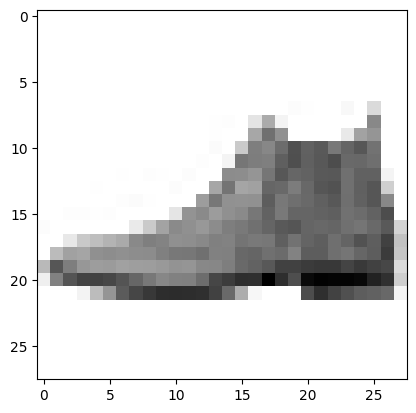

In [6]:
target_index = 0

pred_res = model.predict(test_scaled[target_index:target_index+1])

print('predict_result =>', target_name[np.where(pred_res[0] == 1)[0][0]])

fig, ax = plt.subplots()
ax.imshow(test_input[target_index], cmap='gray_r')

plt.show()